# Kĩ thuật binning: Phân khoảng biến định lượng thành các khoảng định tính

**Mục đính**: 
- Giảm thiểu dữ liệu nhiễu (noise)
- Làm mịn (smooth) dữ liệu 
- Hỗ trợ các bài toán Machine learning như decision Tree

In [1]:
import pandas as pd

df = pd.DataFrame(
    {
        "Math": [4, 4, 7, 8, 12, 13, 15, 18, 22, 23, 23, 25],
        "Eng": [2, 5, 4, 7, 7, 8, 5, 4, 5, 11, 13, 8],
    }
)
df.shape

(12, 2)

In [2]:
df["bin1"] = pd.qcut(df["Math"], q=5)
df

,Math,Eng,bin1
0,4,2,"(3.999, 7.2]"
1,4,5,"(3.999, 7.2]"
2,7,4,"(3.999, 7.2]"
3,8,7,"(7.2, 12.4]"
4,12,7,"(7.2, 12.4]"
5,13,8,"(12.4, 16.8]"
6,15,5,"(12.4, 16.8]"
7,18,4,"(16.8, 22.8]"
8,22,5,"(16.8, 22.8]"
9,23,11,"(22.8, 25.0]"


In [3]:
df["bin1"].value_counts()

bin1
(3.999, 7.2]    3
(22.8, 25.0]    3
(7.2, 12.4]     2
(12.4, 16.8]    2
(16.8, 22.8]    2
Name: count, dtype: int64

In [4]:
df["bin2"] = pd.qcut(df["Math"], q=[0, 0.2, 0.4, 0.6, 0.8, 1])
df

,Math,Eng,bin1,bin2
0,4,2,"(3.999, 7.2]","(3.999, 7.2]"
1,4,5,"(3.999, 7.2]","(3.999, 7.2]"
2,7,4,"(3.999, 7.2]","(3.999, 7.2]"
3,8,7,"(7.2, 12.4]","(7.2, 12.4]"
4,12,7,"(7.2, 12.4]","(7.2, 12.4]"
5,13,8,"(12.4, 16.8]","(12.4, 16.8]"
6,15,5,"(12.4, 16.8]","(12.4, 16.8]"
7,18,4,"(16.8, 22.8]","(16.8, 22.8]"
8,22,5,"(16.8, 22.8]","(16.8, 22.8]"
9,23,11,"(22.8, 25.0]","(22.8, 25.0]"


- Sinh viên tự hiển thị số lượng phần tử trong từng bin2

In [5]:
df['bin2'].value_counts()

bin2
(3.999, 7.2]    3
(22.8, 25.0]    3
(7.2, 12.4]     2
(12.4, 16.8]    2
(16.8, 22.8]    2
Name: count, dtype: int64

In [6]:

df["bin3"] = pd.qcut(
    df["Math"], q=[0, 0.2, 0.4, 0.6, 0.8, 1], labels=["A", "B", "C", "D", "E"]
)
df

,Math,Eng,bin1,bin2,bin3
0,4,2,"(3.999, 7.2]","(3.999, 7.2]",A
1,4,5,"(3.999, 7.2]","(3.999, 7.2]",A
2,7,4,"(3.999, 7.2]","(3.999, 7.2]",A
3,8,7,"(7.2, 12.4]","(7.2, 12.4]",B
4,12,7,"(7.2, 12.4]","(7.2, 12.4]",B
5,13,8,"(12.4, 16.8]","(12.4, 16.8]",C
6,15,5,"(12.4, 16.8]","(12.4, 16.8]",C
7,18,4,"(16.8, 22.8]","(16.8, 22.8]",D
8,22,5,"(16.8, 22.8]","(16.8, 22.8]",D
9,23,11,"(22.8, 25.0]","(22.8, 25.0]",E


- Sinh viên tự hiển thị số lượng phần tử trong từng bin3


In [7]:
df['bin3'].value_counts()

bin3
A    3
E    3
B    2
C    2
D    2
Name: count, dtype: int64

In [8]:

df["bin4"] = pd.cut(
    df["Eng"], bins=[0, 5, 8, float("Inf")], labels=["Bad", "OK", "Good"]
)
df

,Math,Eng,bin1,bin2,bin3,bin4
0,4,2,"(3.999, 7.2]","(3.999, 7.2]",A,Bad
1,4,5,"(3.999, 7.2]","(3.999, 7.2]",A,Bad
2,7,4,"(3.999, 7.2]","(3.999, 7.2]",A,Bad
3,8,7,"(7.2, 12.4]","(7.2, 12.4]",B,OK
4,12,7,"(7.2, 12.4]","(7.2, 12.4]",B,OK
5,13,8,"(12.4, 16.8]","(12.4, 16.8]",C,OK
6,15,5,"(12.4, 16.8]","(12.4, 16.8]",C,Bad
7,18,4,"(16.8, 22.8]","(16.8, 22.8]",D,Bad
8,22,5,"(16.8, 22.8]","(16.8, 22.8]",D,Bad
9,23,11,"(22.8, 25.0]","(22.8, 25.0]",E,Good


- Sinh viên tự hiển thị số lượng phần tử trong từng bin4

In [9]:
df['bin4'].value_counts()

bin4
Bad     6
OK      4
Good    2
Name: count, dtype: int64

# Kỹ thuật mã hóa dữ liệu phân loại (Categorical Data Encoding).

- Cả hai kỹ thuật đều được sử dụng để chuyển đổi dữ liệu dạng phân loại (categorical data) thành dạng số (numerical data) để các thuật toán học máy có thể xử lý được.
- Chúng là các bước tiền xử lý không thể thiếu khi làm việc với dữ liệu phân loại.

## LABEL ENCODING
- Gán một số nguyên duy nhất cho từng giá trị phân loại. *Ví dụ*: ["Red", "Green", "Blue"] → [0, 1, 2]
- **Trường hợp sử dụng**: Khi dữ liệu phân loại có thứ tự (ordinal data). *Ví dụ*: Nhãn cấp độ như ["Low", "Medium", "High"]. 

In [10]:
import pandas as pd

gdp = [11, 22, 33, 44, 55, 66, 77]
countries = ["Spain", "France", "Spain", "Germany", "France"]
df = pd.DataFrame(list(zip(gdp, countries)), columns=["GDP", "Countries"])
df

,GDP,Countries
0,11,Spain
1,22,France
2,33,Spain
3,44,Germany
4,55,France


In [11]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df["labelCountries"] = label_encoder.fit_transform(df["Countries"])
df

,GDP,Countries,labelCountries
0,11,Spain,2
1,22,France,0
2,33,Spain,2
3,44,Germany,1
4,55,France,0


## ONE HOT ENCODING
- Chuyển mỗi giá trị phân loại thành một vector nhị phân.
*Ví dụ*: ["Red", "Green", "Blue"] → 

  |Red|Green|Blue|
  |---|-----|----|
  |1|0|0|
  |0|1|0|
  |0|0|1|
- **Trường hợp sử dụng**: Khi dữ liệu phân loại không có thứ tự (nominal data).
*Ví dụ*: Màu sắc, quốc gia, mã sản phẩm.  

In [12]:
dfOneHotEncoding = pd.get_dummies(df.Countries, prefix="Country")
print(dfOneHotEncoding.head())

   Country_France  Country_Germany  Country_Spain
0           False            False           True
1            True            False          False
2           False            False           True
3           False             True          False
4            True            False          False


In [13]:
df = pd.concat([df, dfOneHotEncoding], axis=1)
df

,GDP,Countries,labelCountries,Country_France,Country_Germany,Country_Spain
0,11,Spain,2,False,False,True
1,22,France,0,True,False,False
2,33,Spain,2,False,False,True
3,44,Germany,1,False,True,False
4,55,France,0,True,False,False


In [14]:
from sklearn.preprocessing import LabelBinarizer

y = LabelBinarizer().fit_transform(df.Countries)
y

array([[0, 0, 1],
       [1, 0, 0],
       [0, 0, 1],
       [0, 1, 0],
       [1, 0, 0]])

In [15]:
from sklearn.preprocessing import OneHotEncoder

y = OneHotEncoder().fit_transform(df[["Countries"]]).toarray()
print(y)

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


## Bài tập: Khi nào dùng One Hot Encoding, Khi nào dùng label encoding

- **Label Encoding**:
  - Khi dữ liệu phân loại có thứ tự (ordinal data).
  - *Ví dụ*: Nhãn cấp độ như ["Low", "Medium", "High"].
- **One-Hot Encoding**:
  - Khi dữ liệu phân loại không có thứ tự (nominal data).
  - *Ví dụ*: Màu sắc, quốc gia, mã sản phẩm.


# SCALING DATA

## MAX ABSOLUTE SCALER

In [16]:
import pandas as pd

year = [2010, 2011, 2012, 2013, 2014, 2015]

salaryHCM = [8.5, 9.0, 10.5, 12.0, 11.0, 10.0]

salaryLA = [5.5, 6.0, 6.0, 5.5, 6.0, 5.0]

df = pd.DataFrame(list(zip(year, salaryHCM, salaryLA)), columns=["Year", "HCM", "LA"])
df

,Year,HCM,LA
0,2010,8.5,5.5
1,2011,9.0,6.0
2,2012,10.5,6.0
3,2013,12.0,5.5
4,2014,11.0,6.0
5,2015,10.0,5.0


In [17]:
max_la = df["LA"].abs().max()
df["macLA"] = df["LA"] / max_la

df

,Year,HCM,LA,macLA
0,2010,8.5,5.5,0.916667
1,2011,9.0,6.0,1.000000
2,2012,10.5,6.0,1.000000
3,2013,12.0,5.5,0.916667
4,2014,11.0,6.0,1.000000
5,2015,10.0,5.0,0.833333


- Sinh viên tự gõ lệnh biểu diễn max absolute của HCM

In [18]:
max_hcm = df["HCM"].abs().max()
df["macHCM"] = df["HCM"] / max_hcm

df

,Year,HCM,LA,macLA,macHCM
0,2010,8.5,5.5,0.916667,0.708333
1,2011,9.0,6.0,1.000000,0.750000
2,2012,10.5,6.0,1.000000,0.875000
3,2013,12.0,5.5,0.916667,1.000000
4,2014,11.0,6.0,1.000000,0.916667
5,2015,10.0,5.0,0.833333,0.833333


In [19]:
from sklearn.preprocessing import MaxAbsScaler

scaler = MaxAbsScaler()
scaled = scaler.fit_transform(df[["HCM", "LA"]])
scaled_df = pd.DataFrame(scaled, columns=df[["HCM", "LA"]].columns)

print(scaled_df)

        HCM        LA
0  0.708333  0.916667
1  0.750000  1.000000
2  0.875000  1.000000
3  1.000000  0.916667
4  0.916667  1.000000
5  0.833333  0.833333


In [20]:
#  Chuyển dữ liệu gốc sang hệ quy chiếu chuẩn hóa (z-scores).

vSc = scaler.transform([[4.5, 5.75]])
vSc

c:\Users\trung\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MaxAbsScaler was fitted with feature names
  warnings.warn(


array([[0.375     , 0.95833333]])

In [21]:
# Chuyển z-scores về giá trị dữ liệu gốc.

vR = scaler.inverse_transform([[0.5, 0.8]])
vR

array([[6. , 4.8]])

## MIN-MAX SCALER

In [22]:
min_la = df["LA"].min()
max_la = df["LA"].max()
df["mmcLA"] = (df["LA"] - min_la) / (max_la - min_la)

df

,Year,HCM,LA,macLA,macHCM,mmcLA
0,2010,8.5,5.5,0.916667,0.708333,0.5
1,2011,9.0,6.0,1.000000,0.750000,1.0
2,2012,10.5,6.0,1.000000,0.875000,1.0
3,2013,12.0,5.5,0.916667,1.000000,0.5
4,2014,11.0,6.0,1.000000,0.916667,1.0
5,2015,10.0,5.0,0.833333,0.833333,0.0


- Sinh viên tự làm min-max scale cho HCM

In [23]:
min_hcm = df['HCM'].min()
max_hcm = df['HCM'].max()
df['mmcHCM'] = (df['HCM'] - min_hcm) / (max_hcm - min_hcm)

df

,Year,HCM,LA,macLA,macHCM,mmcLA,mmcHCM
0,2010,8.5,5.5,0.916667,0.708333,0.5,0.000000
1,2011,9.0,6.0,1.000000,0.750000,1.0,0.142857
2,2012,10.5,6.0,1.000000,0.875000,1.0,0.571429
3,2013,12.0,5.5,0.916667,1.000000,0.5,1.000000
4,2014,11.0,6.0,1.000000,0.916667,1.0,0.714286
5,2015,10.0,5.0,0.833333,0.833333,0.0,0.428571


In [24]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(df[["HCM", "LA"]])
scaled_df = pd.DataFrame(scaled, columns=df[["HCM", "LA"]].columns)

print(scaled_df)

        HCM   LA
0  0.000000  0.5
1  0.142857  1.0
2  0.571429  1.0
3  1.000000  0.5
4  0.714286  1.0
5  0.428571  0.0


**Bài tập**: Giả sử ta có lương của HCM và LA lần lượt là 10.0 và 4.5 thì qua scaler bằng bao nhiêu?

**Trả lời**: Lương HCM 10.0 sau khi scaler là: `0.83333`. Lương LA 4.5 sau khi scaler là: `0`

**Bài tập**: Giả sử có giá trị lần lượt là 0.8 và 1.8 hãy cho biết trước khi biến đổi scaler thì giá trị là bao nhiêu

**Trả lời**: Giả sử 2 giá trị trên đều thuộc 2 thành phố HCM và LA và với dữ liệu đã scaler trước đó. Ta có:

    
|   |HCM |LA  |
|---|----|----|
|0.8|9.6 |4.8 |
|1.8|21.6|10.8|

## Z-SCORE NORMALIZATION

- Dữ liệu cần phân phối gần giống chuẩn (normal distribution).
- Chuyển dữ liệu sang cùng 1 hệ quy chiếu để so sánh.

In [25]:
mean_la = df["LA"].mean()
std_la = df["LA"].std()
df["zLA"] = (df["LA"] - mean_la) / std_la
print(mean_la)
print(std_la)
df

5.666666666666667
0.408248290463863


,Year,HCM,LA,macLA,macHCM,mmcLA,mmcHCM,zLA
0,2010,8.5,5.5,0.916667,0.708333,0.5,0.000000,-0.408248
1,2011,9.0,6.0,1.000000,0.750000,1.0,0.142857,0.816497
2,2012,10.5,6.0,1.000000,0.875000,1.0,0.571429,0.816497
3,2013,12.0,5.5,0.916667,1.000000,0.5,1.000000,-0.408248
4,2014,11.0,6.0,1.000000,0.916667,1.0,0.714286,0.816497
5,2015,10.0,5.0,0.833333,0.833333,0.0,0.428571,-1.632993


- Sinh viên tự tính z-score cho HCM

In [26]:
mean_hcm = df["HCM"].mean()
std_hcm = df["HCM"].std()
df["zHCM"] = (df["HCM"] - mean_hcm) / std_hcm

print(mean_hcm)
print(std_hcm)

df

10.166666666666666
1.2909944487358056


,Year,HCM,LA,macLA,macHCM,mmcLA,mmcHCM,zLA,zHCM
0,2010,8.5,5.5,0.916667,0.708333,0.5,0.000000,-0.408248,-1.290994
1,2011,9.0,6.0,1.000000,0.750000,1.0,0.142857,0.816497,-0.903696
2,2012,10.5,6.0,1.000000,0.875000,1.0,0.571429,0.816497,0.258199
3,2013,12.0,5.5,0.916667,1.000000,0.5,1.000000,-0.408248,1.420094
4,2014,11.0,6.0,1.000000,0.916667,1.0,0.714286,0.816497,0.645497
5,2015,10.0,5.0,0.833333,0.833333,0.0,0.428571,-1.632993,-0.129099


In [27]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(df[["HCM", "LA"]])

scaled_df = pd.DataFrame(scaled, columns=df[["HCM", "LA"]].columns)

print(scaled_df)

        HCM        LA
0 -1.414214 -0.447214
1 -0.989949  0.894427
2  0.282843  0.894427
3  1.555635 -0.447214
4  0.707107  0.894427
5 -0.141421 -1.788854


- Hãy dùng Z-Score để đưa ra kết luận: Nếu một người có thu nhập 15 triệu ở HCM, một người ở LA có thu nhập 12 triệu thì người nào sinh hoạt thoải mái hơn:
  - người có thu nhập 15 triệu ở HCM có z-score là `(15 - 10.1666) / 1.2909` = `3.7442`   
  - người có thu nhập 12 triệu ở LA có z-score là `(12 - 5.6666) / 0.4082` = `15.5154`
  - Vậy người LA thu nhập 12 triệu sẽ sống thoải mái hơn người HCM thu nhập 15 triệu (15.5154 > 3.7442)

In [28]:
def funcX(x):
    return x * x + 1


df["TransformX"] = funcX(df[["LA"]])

df

,Year,HCM,LA,macLA,macHCM,mmcLA,mmcHCM,zLA,zHCM,TransformX
0,2010,8.5,5.5,0.916667,0.708333,0.5,0.000000,-0.408248,-1.290994,31.25
1,2011,9.0,6.0,1.000000,0.750000,1.0,0.142857,0.816497,-0.903696,37.00
2,2012,10.5,6.0,1.000000,0.875000,1.0,0.571429,0.816497,0.258199,37.00
3,2013,12.0,5.5,0.916667,1.000000,0.5,1.000000,-0.408248,1.420094,31.25
4,2014,11.0,6.0,1.000000,0.916667,1.0,0.714286,0.816497,0.645497,37.00
5,2015,10.0,5.0,0.833333,0.833333,0.0,0.428571,-1.632993,-0.129099,26.00


### Bài tập
- Sinh viên vẽ biểu đồ phân phối lương trung bình của HCM
- Tính skenewss và kurtorsis của lương trung bình HCM
- Sử dụng hàm log để transform dữ liệu lương ở HCM
- Vẽ biểu đồ phân phối của dữ liệu lương trung bình của HCM sau khi transform
- Tính skenewss và kurtorsis của dữ liệu lương trung bình HCM sau khi transform
- Hãy so sánh độ nghiêng, độ nhọn phân phối sau khi transform so với dữ liệu ban đầu 

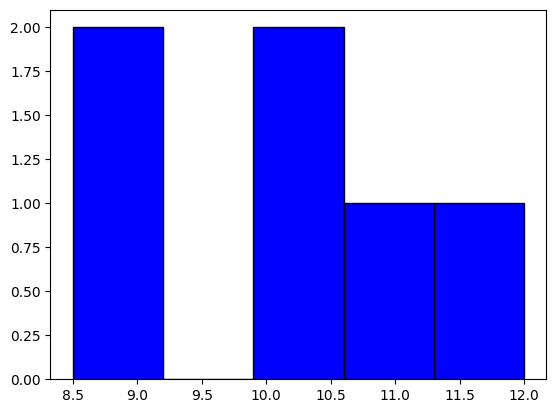

In [31]:
# Sinh viên vẽ biểu đồ phân phối lương trung bình của HCM
import matplotlib.pyplot as plt


plt.hist(df["HCM"], bins=5, color="blue", edgecolor="black")
plt.show()

In [ ]:
# Tính skenewss và kurtorsis của lương trung bình HCM
skewness = df["HCM"].skew()
kutorsis = df["HCM"].kurtosis()
print("Skewness: ", skewness) # Lệch phải một chút
print("Kurtosis: ", kutorsis) # Nhọn 

Skewness:  0.07745966692415059
Kurtosis:  -0.8669999999999982


In [33]:
# Sử dụng hàm log để transform dữ liệu lương ở HCM

import numpy as np

df["logHCM"] = np.log(df["HCM"])
df

,Year,HCM,LA,macLA,macHCM,mmcLA,mmcHCM,zLA,zHCM,TransformX,logHCM
0,2010,8.5,5.5,0.916667,0.708333,0.5,0.000000,-0.408248,-1.290994,31.25,2.140066
1,2011,9.0,6.0,1.000000,0.750000,1.0,0.142857,0.816497,-0.903696,37.00,2.197225
2,2012,10.5,6.0,1.000000,0.875000,1.0,0.571429,0.816497,0.258199,37.00,2.351375
3,2013,12.0,5.5,0.916667,1.000000,0.5,1.000000,-0.408248,1.420094,31.25,2.484907
4,2014,11.0,6.0,1.000000,0.916667,1.0,0.714286,0.816497,0.645497,37.00,2.397895
5,2015,10.0,5.0,0.833333,0.833333,0.0,0.428571,-1.632993,-0.129099,26.00,2.302585


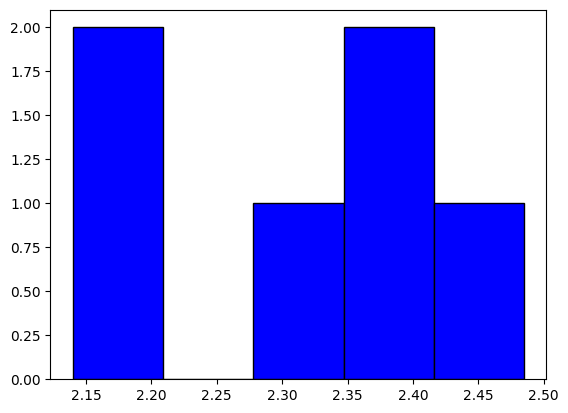

In [34]:
# Vẽ biểu đồ phân phối của dữ liệu lương trung bình của HCM sau khi transform
plt.hist(df["logHCM"], bins=5, color="blue", edgecolor="black")
plt.show()

In [ ]:
# Tính skenewss và kurtorsis của dữ liệu lương trung bình HCM sau khi transform
skewness = df["logHCM"].skew()
kutorsis = df["logHCM"].kurtosis()
print("Skewness: ", skewness) # lệch phải
print("Kurtosis: ", kutorsis) # nhọn hơn

Skewness:  -0.11718252208187868
Kurtosis:  -1.0020488187699383


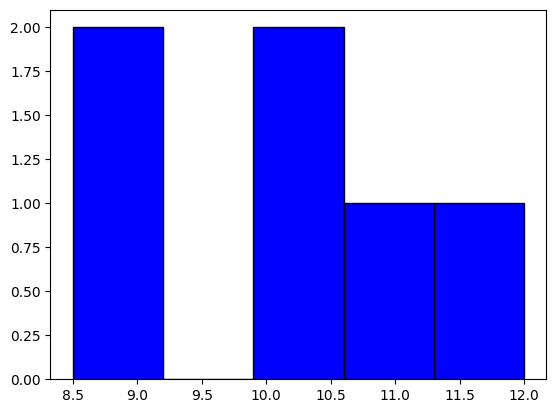

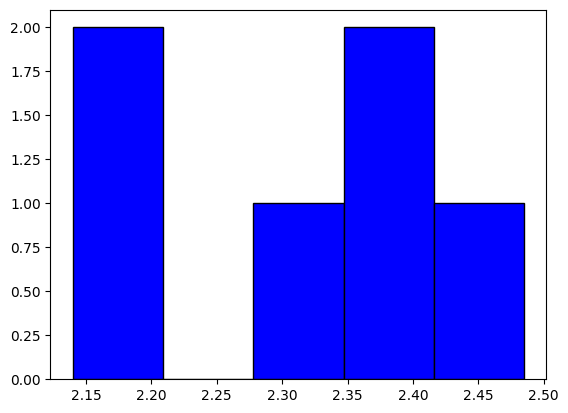

In [ ]:
# Hãy so sánh độ nghiêng, độ nhọn phân phối sau khi transform so với dữ liệu ban đầu

# Vẽ biểu đồ phân phối của dữ liệu lương trung bình của HCM trước khi transform
plt.hist(df["HCM"], bins=5, color="blue", edgecolor="black")
plt.show()

# Vẽ biểu đồ phân phối của dữ liệu lương trung bình của HCM sau khi transform
plt.hist(df["logHCM"], bins=5, color="blue", edgecolor="black")
plt.show()


# Sau khi transform dữ liệu lương trung bình của HCM, phân phối dữ liệu trở nên lệch phải hơn và nhọn hơn so với dữ liệu ban đầu